In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# ------------------------------------ Cleanup CSV files --------------------------------------------------------

# Get sources of raw data for cleanup
species_filename1 = "../Data/Clean/Monarch/Monarch_clean.csv"
species_filename2 = "../Data/Clean/Whale/Blue_Whale.csv"
species_filename3 = "../Data/Clean/Whale/Humpback_whale.csv"
species_filename4 = "../Data/Clean/Tern/Arctic Tern.csv"

# Reading csv files
#df_monarch = pd.read_csv(species_filename1)
#df_blue_whale = pd.read_csv(species_filename2)
#df_humpback_whale = pd.read_csv(species_filename3)
df_arctic_tern = pd.read_csv(species_filename4)

In [29]:
#df_monarch.head()

In [ ]:
#df_blue_whale.head()

In [ ]:
#df_humpback_whale.head()

In [3]:
df_arctic_tern.head()

,geom,oid,longitude,latitude,providers,species,datasets,date_min,date_max,num_records,num_animals,num_species,csquare,geom_wkt
0,0103000020E61000000100000005000000000000000040...,6785394,-179,52,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,2,200.0,1,7517:218,"POLYGON((-178 51,-179 51,-179 52,-178 52,-178 ..."
1,0103000020E61000000100000005000000000000000020...,6785377,-178,52,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,13.0,1,7517:217,"POLYGON((-177 51,-178 51,-178 52,-177 52,-177 ..."
2,0103000020E61000000100000005000000000000000000...,6785361,-177,52,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,6.0,1,7517:216,"POLYGON((-176 51,-177 51,-177 52,-176 52,-176 ..."
3,0103000020E61000000100000005000000000000000040...,6785762,-170,63,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,194.0,1,7617:130,"POLYGON((-170 63,-171 63,-171 64,-170 64,-170 ..."
4,0103000020E610000001000000050000000000000000C0...,6785281,-166,60,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,152.0,1,7516:496,"POLYGON((-166 59,-167 59,-167 60,-166 60,-166 ..."


In [44]:
# Convert String column into Date/Time column in DF
df_arctic_tern['date_time'] = pd.to_datetime(df_arctic_tern['date_time'])
df_arctic_tern["date"] = df_arctic_tern["date_time"].dt.strftime("%d/%m/%Y")
time_series = pd.DataFrame(df_arctic_tern['date_time'].value_counts().reset_index())
time_series.columns = ['date', 'count']
time_series.head()

,date,count
0,2007-08-18 02:22:00,3
1,2008-03-12 14:53:00,2
2,2008-02-12 01:51:00,2
3,2007-10-24 22:53:00,2
4,2007-11-07 01:19:00,2


(array([732889., 732920., 732950., 732981., 733011., 733042., 733073.,
        733102., 733133., 733163., 733194.]),
 <a list of 11 Text xticklabel objects>)

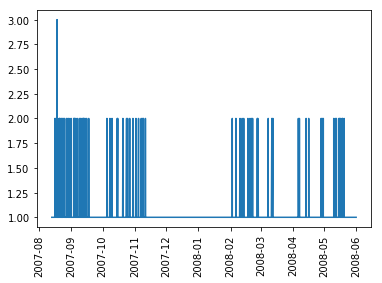

In [45]:
time_series = time_series.sort_values('date', ascending=True)
plt.plot(time_series['date'], time_series['count'])
plt.xticks(rotation='vertical')

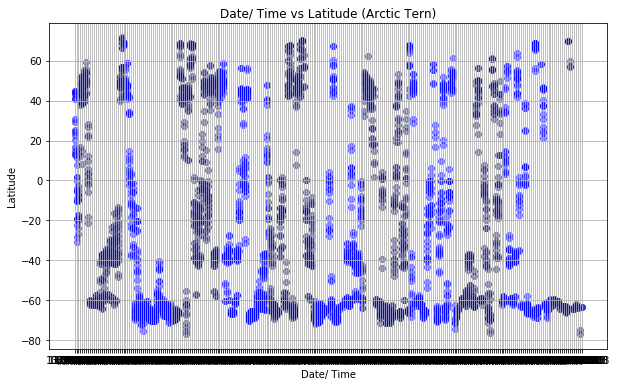

In [46]:
# Plotting the Data - Date/Time vs. Latitude
plt.figure(figsize=(10,6))
plt.scatter(df_arctic_tern["date"], df_arctic_tern["latitude"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Date/ Time')
plt.ylabel('Latitude')
plt.title(f'Date/ Time vs Latitude ({df_arctic_tern["common"][1]})')
# plt.savefig("./output_data/LatVsMaxTemp.png")
plt.show()